In [1]:
import get_kepler

In [2]:
import pandas as pd

In [3]:
kics = pd.read_csv("periods.csv")

In [6]:
kics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 2 columns):
KIC       898 non-null int64
Period    898 non-null float64
dtypes: float64(1), int64(1)
memory usage: 14.2 KB


In [4]:
kics2 = pd.read_csv("keplerperiods.csv")

In [5]:
kics2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
KIC       996 non-null int64
Period    996 non-null float64
teff      996 non-null float64
logg      996 non-null float64
radius    996 non-null float64
mass      996 non-null float64
dens      996 non-null float64
dtypes: float64(6), int64(1)
memory usage: 54.6 KB


In [11]:
kics.head()

,KIC,Period
0,10280371,15.122
1,11921886,4.442
2,11768170,14.120
3,7269974,1.378
4,2163808,7.336


In [7]:
kics2.head()

,KIC,Period,teff,logg,radius,mass,dens
0,10280371,15.122,5864.0,4.094,1.473,0.982,0.43310
1,11921886,4.438,5510.0,3.639,2.608,1.080,0.08575
2,11768170,13.486,5295.0,3.701,2.696,1.331,0.09567
3,7269974,1.378,5539.0,4.332,1.098,0.942,1.00400
4,2163808,7.389,5739.0,4.051,1.486,0.905,0.38860


In [12]:
df_keplers = pd.read_csv("keplers.csv")

In [13]:
df_keplers = df_keplers[['kepid','teff','logg','radius','mass','dens']]

In [ ]:
df_periods = pd.DataFrame()
columns = ["KIC","Period"]
for kic in kics2.KIC:
    try:
        df = get_kepler.read_csv(kic)
        per = df["period"]
        df_periods = df_periods.append(pd.DataFrame(data=[[kic,per]],columns=columns))
    except:
        df_periods = df_periods.append(pd.DataFrame(data=[[kic,0.0]],columns=columns))

In [14]:
df_periods = kics.merge(df_keplers,left_on='KIC',right_on='kepid')

In [15]:
df_periods = df_periods.drop(columns=['kepid'])

In [16]:
df_periods.head()

,KIC,Period,teff,logg,radius,mass,dens
0,10280371,15.122,5864,4.094,1.473,0.982,0.43310
1,11921886,4.442,5510,3.639,2.608,1.080,0.08575
2,11768170,14.120,5295,3.701,2.696,1.331,0.09567
3,7269974,1.378,5539,4.332,1.098,0.942,1.00400
4,2163808,7.336,5739,4.051,1.486,0.905,0.38860


In [10]:
df_periods_2 = pd.read_csv("keplerperiods.csv")

In [11]:
df_periods_2.head()

,KIC,Period,teff,logg,radius,mass,dens
0,10280371,15.122,5864.0,4.094,1.473,0.982,0.43310
1,11921886,4.438,5510.0,3.639,2.608,1.080,0.08575
2,11768170,13.486,5295.0,3.701,2.696,1.331,0.09567
3,7269974,1.378,5539.0,4.332,1.098,0.942,1.00400
4,2163808,7.389,5739.0,4.051,1.486,0.905,0.38860


In [9]:
df_valids = df_periods[(df_periods.Period > 0)&(df_periods.Period < 55)]

In [10]:
df_valids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 998
Data columns (total 7 columns):
KIC       871 non-null float64
Period    871 non-null float64
teff      871 non-null float64
logg      871 non-null float64
radius    871 non-null float64
mass      871 non-null float64
dens      871 non-null float64
dtypes: float64(7)
memory usage: 54.4 KB


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.75))

<Figure size 3000x2000 with 0 Axes>

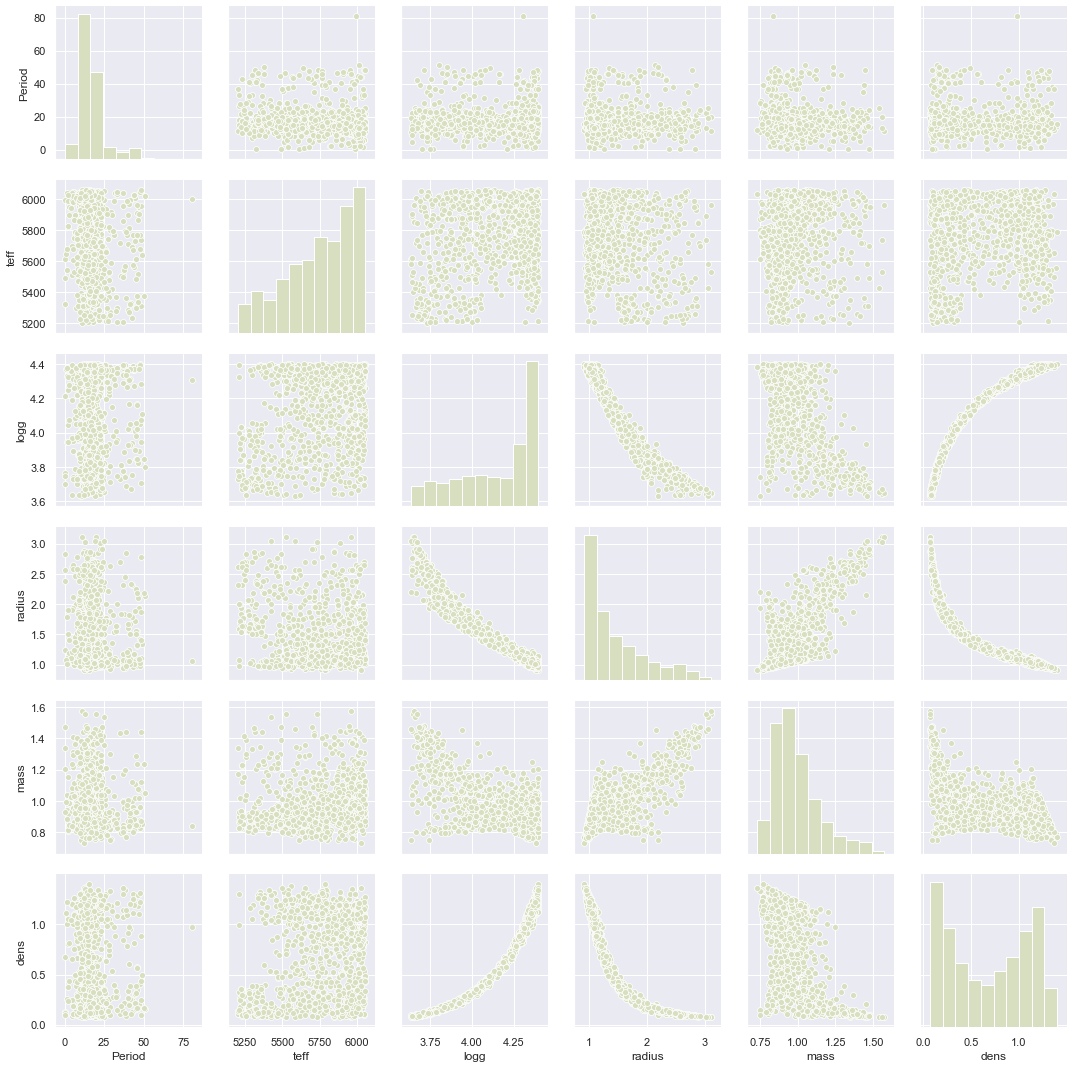

In [20]:
plt.figure(1,dpi=500)
sns.pairplot(df_periods.drop(columns=["KIC"]))

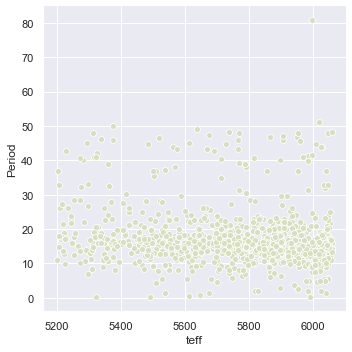

In [22]:
sns.relplot(x='teff',y='Period', data=df_periods)

In [3]:
1 <= 2

True

In [2]:
import utils